Classsification :
    
  - Binary Class Classification : Single classification , one or the other, spam/notSpam
    hidden activation : relu
    output activation : sigmoid
    outplut shape : 1
    loss function : Binary Cross Entropy
  - Multi Class Classification : Multiple classes , like food ( pizza, pasta, dosa ...etc)
    hidden activation : relu
    output activation : softmax
    output shape : 1 per class
    loss function : Categorical Cross Entropy    
  - MultiLabel Classification : Multiple labels for a single sample. ( like a lables/tags for a video)

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# sample datasets
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42
                  )

In [4]:
def plot_decision_boundary(model, x_input, y_input):
    """
     Plots the decision boundary created by a model predicting on X
    """
    print(f"[plot_decision_boundary] The total number of elements in x_input[{len(x_input)}] & y_input[len(y_input)]")
    x_min, x_max = x_input[:, 0].min() - 0.1, x_input[:, 0].max()+0.1
    y_min, y_max = x_input[:, 1].min() - 0.1, x_input[:, 1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Stack 2D matrices
    x_in = np.c_[xx.ravel(), yy.ravel()]
    print("[plot_decision_boundary] Input shape : {}".format(x_in.shape))
    y_pred = model.predict(x_in)
    
    if len(y_pred[0])> 1:
        print("[plot_decision_boundary] Doing multiclass classification")
        y_pred =np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("[plot_decision_boundary] Doing Binary Classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x_input[:,0], x_input[:, 1], c=y_input, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [5]:
X[0]

array([0.75424625, 0.23148074])

In [6]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
X.shape

(1000, 2)

In [8]:
X[:, 0]

array([ 7.54246251e-01, -7.56158882e-01, -8.15391934e-01, -3.93730729e-01,
        4.42207645e-01, -4.79646368e-01, -1.36483595e-02,  7.71513274e-01,
       -1.69322340e-01, -1.21485796e-01, -6.42490416e-01,  5.69466604e-01,
       -1.17735911e-01,  7.34100038e-01,  6.00776333e-01,  1.90225707e-01,
       -9.36951846e-01,  1.07061696e-01, -8.18913619e-01, -6.42100130e-01,
        6.26827199e-01, -5.62291360e-01, -2.12666579e-02,  7.39770578e-01,
       -9.09048393e-01, -9.36994111e-01,  2.86615780e-01,  8.26260717e-01,
        2.53433397e-01,  6.57946255e-01, -3.14834779e-01, -2.23989601e-01,
        8.44389246e-03,  1.00503887e+00, -8.95158198e-02, -7.88574473e-01,
       -5.68205362e-01,  4.47646782e-01,  2.63260719e-01,  7.45020435e-01,
       -5.97118971e-01,  3.61928379e-01, -7.14242507e-01,  8.33839377e-01,
       -8.33981856e-01, -9.10860642e-01,  4.87625557e-01,  2.30736878e-01,
        7.58412791e-01, -4.12746839e-01,  4.76176622e-01,  3.99958509e-02,
       -9.66328252e-01,  

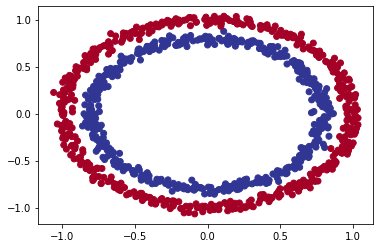

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu )
# Y is the color category, red for o, blue for y =1 

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
X[0], y[0]  # point of red 

(array([0.75424625, 0.23148074]), 1)

In [12]:
X[9], y[9] # point of blue 

(array([-0.1214858 ,  1.02150905]), 0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X_train), len(X_test), len(y_train),len(y_test)

(700, 300, 700, 300)

In [14]:
X.shape, X_train.shape

((1000, 2), (700, 2))

2022-01-18 17:52:55.529719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 17:52:55.582285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 17:52:55.583028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 17:52:55.584849: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Red_Dot_Blue_Dot_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                30        
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


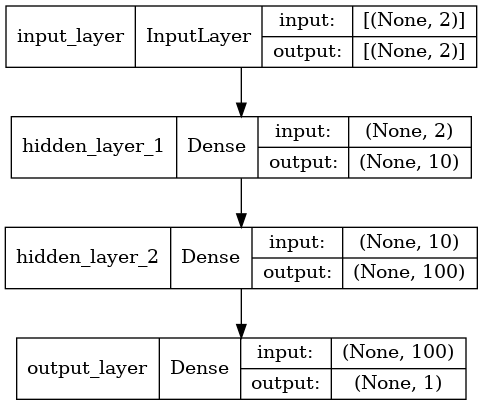

In [15]:
tf.random.set_seed(42)

red_blue_model = tf.keras.Sequential(layers=[
    tf.keras.layers.InputLayer(input_shape=[2], name="input_layer"),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=100, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer"),
], name="Red_Dot_Blue_Dot_model")

red_blue_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.SGD(),
                      metrics=["accuracy"])

red_blue_model.summary()
tf.keras.utils.plot_model(model=red_blue_model, show_shapes=True)

In [16]:
red_blue_model_history = red_blue_model.fit(X_train,
                                            y_train,
                                            epochs=200)


Epoch 1/200
22/22 [==============================] - 2s 5ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.5100
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5071
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5157
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5100
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5057
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5143
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5186
Epoch 10/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5129
Epoch 11/

22/22 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.8057
Epoch 84/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.8114
Epoch 85/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.8029
Epoch 86/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.8057
Epoch 87/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.8086
Epoch 88/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.8129
Epoch 89/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.8114
Epoch 90/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.8029
Epoch 91/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.8114
Epoch 92/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.8057
Epoch 93/200


22/22 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.8843
Epoch 165/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.8814
Epoch 166/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.8714
Epoch 167/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.8771
Epoch 168/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.8786
Epoch 169/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.8757
Epoch 170/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.8814
Epoch 171/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.8857
Epoch 172/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.8886
Epoch 173/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.8829
Epoc

Text(0, 0.5, 'accuracy')

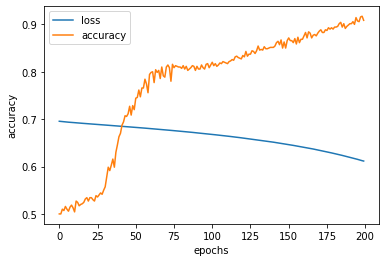

In [17]:
pd.DataFrame(red_blue_model_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")

 ---> 200epochs, 2 layers, 10L, 1L
 
 10/10 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6300
 
 This indicates that the model is only 63% sure. Not that good.
 - - - - - - - -

 --->200epochs, 2 layers, 20L, 1L
 
 10/10 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5167
 
 This indicates that the model is only 51% sure. Worse than before
- - - - - - - -
 
 --->150epochs, 2 layers, 10L, 1L
 
 10/10 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5167
 
 This indicates that the model is only 51% sure. Worse than before
- - - - - - - -

 
 --->100epochs, 2 layers, 10L, 1L
 
 10/10 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.4667
 
 This indicates that the model is only 46% sure. Worse than before
- - - - - - - -



---> 200epochs, 2 layers, 100L, 1L, Adam optimizer

10/10 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.4900

This indicates that the model is only 49% sure. Not that good.
- - - - - - - -


---> 200epochs, 3 layers, 10L,100L, 1L, Adam optimizer

10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000

This indicates that the model is only 100% sure. Good.
- - - - - - - -


In [18]:
red_blue_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.8867


[0.6150381565093994, 0.8866666555404663]

[plot_decision_boundary] The total number of elements in x_input[700] & y_input[len(y_input)]
[plot_decision_boundary] Input shape : (10000, 2)
[plot_decision_boundary] Doing Binary Classification


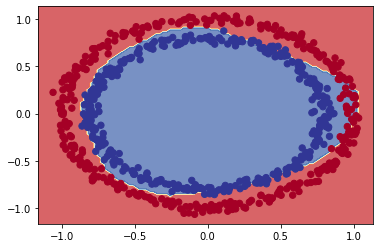

In [19]:
plot_decision_boundary(red_blue_model, x_input=X_train, y_input=y_train)

In [20]:
# Creating the model
red_blue_model_adam = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[2], name="input_layer"),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=100, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
], name="red_blue_model_adam")
# Compiling the model
red_blue_model_adam.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])
# Getting the summary and the architecture
red_blue_model_adam.summary()
tf.keras.utils.plot_model(model=red_blue_model_adam, show_shapes=True)
# Fitting the model
red_blue_model_adam_history = red_blue_model_adam.fit(X_train, y_train, epochs=200)
# evaluating the model
red_blue_model_adam.evaluate(X_test, y_test)

Model: "red_blue_model_adam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                30        
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5014
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5071
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.5200
Epoch 4/200


22/22 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 75/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 76/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 77/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 78/200
22/22 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 79/200
22/22 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 80/200
22/22 [==============================] - 0s 6ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 81/200
22/22 [==============================] - 0s 6ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 82/200
22/22 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 83/200
22/22 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 84/200


22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 156/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 157/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 158/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 159/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 160/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 161/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 162/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 163/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 164/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000
Epoc

[0.004767525475472212, 1.0]

[plot_decision_boundary] The total number of elements in x_input[700] & y_input[len(y_input)]
[plot_decision_boundary] Input shape : (10000, 2)
[plot_decision_boundary] Doing Binary Classification


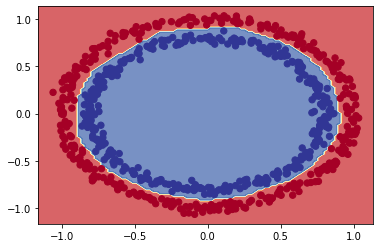

In [21]:
plot_decision_boundary(red_blue_model_adam, x_input=X_train, y_input=y_train)

[plot_decision_boundary] The total number of elements in x_input[700] & y_input[len(y_input)]
[plot_decision_boundary] Input shape : (10000, 2)
[plot_decision_boundary] Doing Binary Classification
[plot_decision_boundary] The total number of elements in x_input[300] & y_input[len(y_input)]
[plot_decision_boundary] Input shape : (10000, 2)
[plot_decision_boundary] Doing Binary Classification


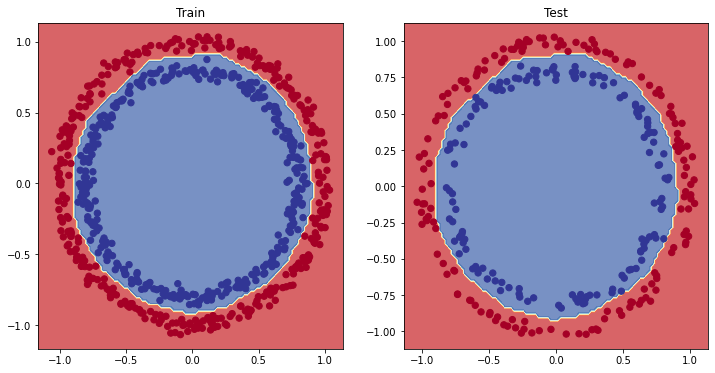

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(red_blue_model_adam, x_input=X_train, y_input=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(red_blue_model_adam, x_input=X_test, y_input=y_test)
plt.show();

Text(0, 0.5, 'Accuracy/loss')

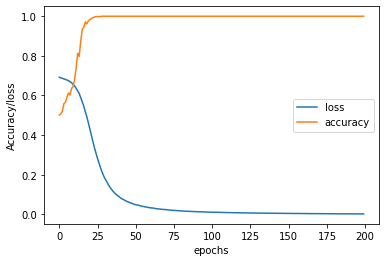

In [23]:
pd.DataFrame(red_blue_model_adam_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Accuracy/loss")

Model: "RedDotBlueDotCustomModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                30        
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


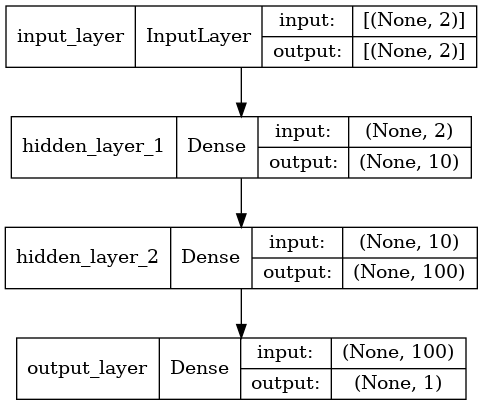

In [24]:
# Learning Rate Customization
# Set the random seed
tf.random.set_seed(42)

# Create the nerual network
red_blue_custom_model = tf.keras.Sequential(layers=[
    tf.keras.layers.InputLayer(input_shape=[2], name="input_layer"),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=100, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
], name="RedDotBlueDotCustomModel")
red_blue_custom_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=["accuracy"])
red_blue_custom_model.summary()
tf.keras.utils.plot_model(model=red_blue_custom_model,
                          show_shapes=True,
                          # to_file="RedDotBlueDotCustomModel.png",
                          # show_layer_activations=True
                         )

In [25]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: ((1e-4) * 10**(epoch/20)))

In [26]:
hisotry_custom = red_blue_custom_model.fit(
    X_train, 
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5071 - lr: 1.1220e-04
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5029 - lr: 1.2589e-04
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5014 - lr: 1.4125e-04
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5057 - lr: 1.5849e-04
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.4929 - lr: 1.7783e-04
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.4971 - lr: 1.9953e-04
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5086 - lr: 2.2387e-04
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss:

Epoch 73/100
22/22 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8986 - lr: 0.3981
Epoch 74/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4613 - accuracy: 0.7786 - lr: 0.4467
Epoch 75/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5152 - accuracy: 0.8029 - lr: 0.5012
Epoch 76/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.5900 - lr: 0.5623
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6480 - accuracy: 0.5457 - lr: 0.6310
Epoch 78/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5300 - lr: 0.7079
Epoch 79/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.5043 - lr: 0.7943
Epoch 80/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7056 - accuracy: 0.4900 - lr: 0.8913
Epoch 81/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7453 - accuracy: 0.4

Text(0.5, 0, 'Epochs')

<Figure size 720x504 with 0 Axes>

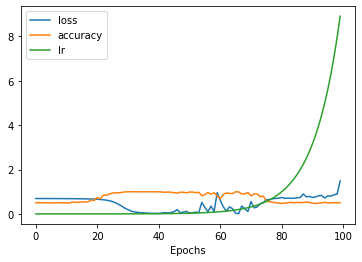

In [27]:
plt.figure(figsize=(10,7))
pd.DataFrame(hisotry_custom.history).plot()
plt.xlabel("Epochs")
# Can see that the learning rate was low, the loss also was low
# But after a threshold of learning rate, when the learning rate increased,
# the loss also started to increase

In [28]:
lrs = (1e-4)*10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 0, 'Epochs')

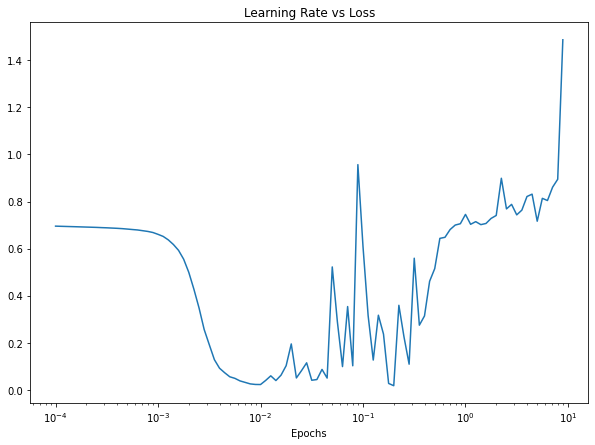

In [29]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hisotry_custom.history["loss"])
plt.title("Learning Rate vs Loss")
plt.xlabel("Epochs")
# notice that around 10^-2, the learning rate and the loss are at the best

Model: "OptimzedModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                30        
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


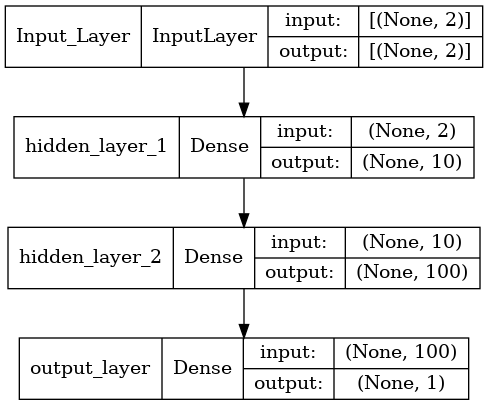

In [30]:
tf.random.set_seed(42)
optimized_model = tf.keras.Sequential(layers=[
    tf.keras.layers.InputLayer(input_shape=[2], name="Input_Layer"),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=100, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer"),
], name="OptimzedModel")
optimized_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        # pickerd 0.02 - 0.03 from the graph above
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                        metrics=["accuracy"])
optimized_model.summary()
tf.keras.utils.plot_model(model=optimized_model, show_shapes=True)

In [31]:
optimized_history = optimized_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 5ms/step - loss: 0.6743 - accuracy: 0.5814
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7786
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2130 - accuracy: 0.9657
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1044 - accuracy: 0.9714
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0640 - accuracy: 0.9814
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1445 - accuracy: 0.9471
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9786
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0458 - accuracy: 0.9857
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0604 - accuracy: 0.9729
Epoch 11/

22/22 [==============================] - 0s 4ms/step - loss: 3.3483e-04 - accuracy: 1.0000
Epoch 82/100
22/22 [==============================] - 0s 5ms/step - loss: 3.3133e-04 - accuracy: 1.0000
Epoch 83/100
22/22 [==============================] - 0s 5ms/step - loss: 3.0827e-04 - accuracy: 1.0000
Epoch 84/100
22/22 [==============================] - 0s 5ms/step - loss: 3.0151e-04 - accuracy: 1.0000
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 2.8631e-04 - accuracy: 1.0000
Epoch 86/100
22/22 [==============================] - 0s 5ms/step - loss: 2.8356e-04 - accuracy: 1.0000
Epoch 87/100
22/22 [==============================] - 0s 5ms/step - loss: 2.7852e-04 - accuracy: 1.0000
Epoch 88/100
22/22 [==============================] - 0s 5ms/step - loss: 2.7103e-04 - accuracy: 1.0000
Epoch 89/100
22/22 [==============================] - 0s 4ms/step - loss: 2.4993e-04 - accuracy: 1.0000
Epoch 90/100
22/22 [==============================] - 0s 5ms/step - loss: 2.6

Text(0.5, 1.0, 'LearningRate, Loss, Accuracy Over Epochs')

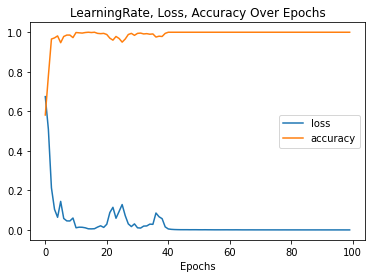

In [32]:
pd.DataFrame(optimized_history.history).plot()
plt.xlabel("Epochs")
plt.title("LearningRate, Loss, Accuracy Over Epochs")

In [33]:
optimized_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0013930578716099262, 1.0]

[plot_decision_boundary] The total number of elements in x_input[700] & y_input[len(y_input)]
[plot_decision_boundary] Input shape : (10000, 2)
[plot_decision_boundary] Doing Binary Classification
[plot_decision_boundary] The total number of elements in x_input[300] & y_input[len(y_input)]
[plot_decision_boundary] Input shape : (10000, 2)
[plot_decision_boundary] Doing Binary Classification


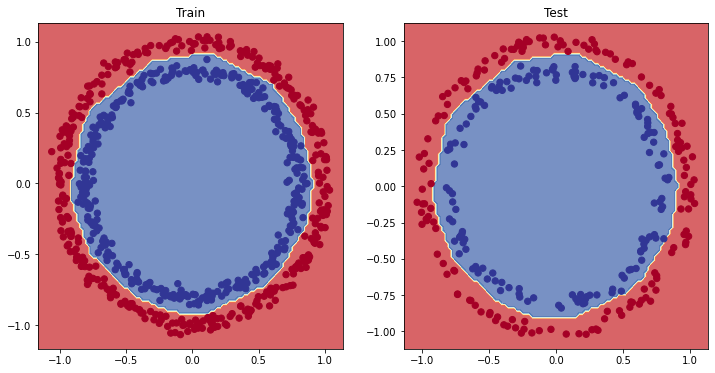

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(optimized_model, x_input=X_train, y_input=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(optimized_model, x_input=X_test, y_input=y_test)
plt.show();

## More classification methods
 - Accuracy
 - Precision : Decrease false positives
 - Recall : Decrease false negatives
 - F1 Matrix 
 - Confusion Matrix
 - Classification Report ( scikit-learn )

In [35]:
optimized_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0013930578716099262, 1.0]

In [36]:
loss, accuracy = optimized_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000


In [38]:
from sklearn.metrics import confusion_matrix
y_preds = optimized_model.predict(X_test)
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [41]:
tf.squeeze(tf.round(y_preds))


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0.], dtype=float32)>

In [42]:
confusion_matrix(y_test, tf.round(y_preds))

array([[155,   0],
       [  0, 145]])

In [43]:
len(y_preds)

300

In [79]:
import itertools
def plot_confusion_matrix(y_test, y_preds, classes=False):
    """
     Prints the confusion matrix
    """
    conf_matrix = confusion_matrix(y_test, tf.round(y_preds))
    print(f"[print_confusion_matrix] The confusion matrix, shape : \n{conf_matrix}, {conf_matrix.shape}")
    conf_matrix_norm = conf_matrix.astype("float")/conf_matrix.sum(axis=1)[:, np.newaxis]
    print(f"[print_confusion_matrix] The matrix normalized is ::\n {conf_matrix_norm}")
    n_classes = conf_matrix.shape[0]
    
    # prettier
    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    # classes
    if classes:
        labels = classes
    else:
        labels= np.arange(conf_matrix.shape[0])
        
    # axis ticks and label at the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    # label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicated Label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels,
          )
    threshold = (conf_matrix.max() + conf_matrix.min()) / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, f"{conf_matrix[i, j]} ({conf_matrix_norm[i, j]*100:.1f})%)",
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > threshold else "black",
                size=15)

[print_confusion_matrix] The confusion matrix, shape : 
[[137  18]
 [ 16 129]], (2, 2)
[print_confusion_matrix] The matrix normalized is ::
 [[0.88387097 0.11612903]
 [0.11034483 0.88965517]]


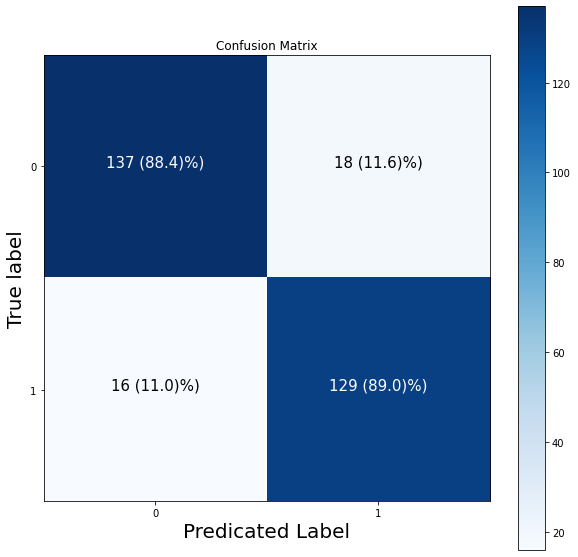

In [81]:
y_preds_sgd = red_blue_model.predict(X_test)
plot_confusion_matrix(y_test, y_preds_sgd)

[print_confusion_matrix] The confusion matrix, shape : 
[[155   0]
 [  0 145]], (2, 2)
[print_confusion_matrix] The matrix normalized is ::
 [[1. 0.]
 [0. 1.]]


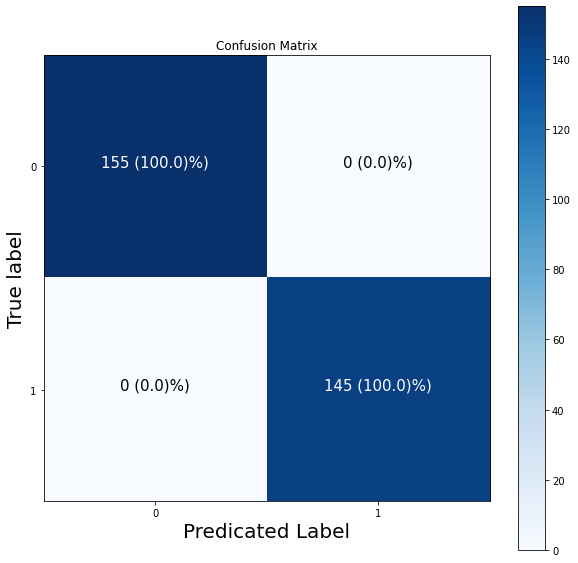

In [82]:
y_preds = optimized_model.predict(X_test)
plot_confusion_matrix(y_test, y_preds)

# MultiClass Classification

In [83]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels)= fashion_mnist.load_data()

In [84]:
print(f" Training Sample : {len(train_data)}")
print(f" Training labels : {len(train_labels)}")

 Training Sample : 60000
 Training labels : 60000


In [86]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [89]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

5


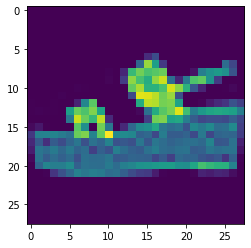

In [94]:
print(train_labels[12])
plt.imshow(train_data[12])

In [97]:
class_names = ["Tshirt", "Trouser", "PullOver", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "AnkleBoot"]
print(len(class_names))

10


Model: "FashionClothingClassifierRaw"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 10)                7850      
                                                                 
 hidden_layer_2 (Dense)      (None, 20)                220       
                                                                 
 output_layer (Dense)        (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


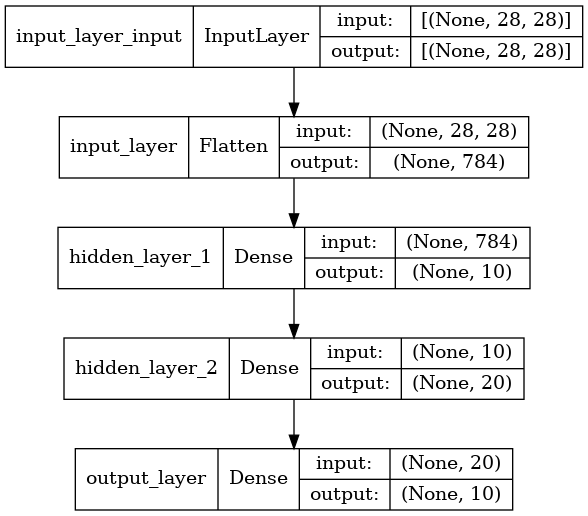

In [111]:
# Build the model
tf.random.set_seed(42)
# one_hot_labels

# Raw indicates, un normalized
fashion_model_raw = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input_layer"),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=20, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=10, activation="softmax", name="output_layer")
], name="FashionClothingClassifierRaw")
fashion_model_raw.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
fashion_model_raw.summary()
tf.keras.utils.plot_model(model=fashion_model_raw, show_shapes=True)

In [112]:
# One hot the labels
train_labels_encoded = tf.one_hot(train_labels, depth=10)
test_labels_encoded = tf.one_hot(test_labels, depth=10)

In [113]:
history_raw = fashion_model_raw.fit(train_data,
                      train_labels_encoded,
                      epochs=10,
                      validation_data=(test_data, test_labels_encoded)
                     )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5391 - accuracy: 0.1310 - val_loss: 2.1900 - val_accuracy: 0.1496
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0592 - accuracy: 0.2037 - val_loss: 1.9567 - val_accuracy: 0.2376
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7005 - accuracy: 0.3158 - val_loss: 1.5473 - val_accuracy: 0.3877
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3967 - accuracy: 0.4281 - val_loss: 1.3190 - val_accuracy: 0.4592
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3019 - accuracy: 0.4515 - val_loss: 1.4128 - val_accuracy: 0.3747
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2633 - accuracy: 0.4674 - val_loss: 1.1885 - val_accuracy: 0.5060
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1573 - accuracy: 0.5195 - val_loss: 1.1823 - val_accuracy:

In [117]:
fashion_model_raw.evaluate(test_data, test_labels_encoded)

313/313 [==============================] - 1s 3ms/step - loss: 0.9991 - accuracy: 0.5851


[0.9991042017936707, 0.585099995136261]

In [123]:
train_data_norm = train_data / 255.0
test_data_norm  = test_data / 255.0

Model: "FashionClothesClassifierNormal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 10)                7850      
                                                                 
 hidden_layer_2 (Dense)      (None, 20)                220       
                                                                 
 output_layer (Dense)        (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


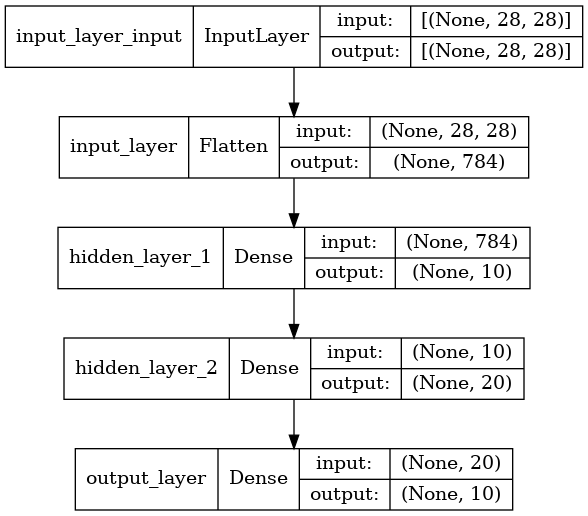

In [124]:
tf.random.set_seed(42)
# After normalization
fashion_model_norm = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input_layer'),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=20, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=10, activation="softmax", name="output_layer"),    
], name="FashionClothesClassifierNormal")
fashion_model_norm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])
fashion_model_norm.summary()
tf.keras.utils.plot_model(model=fashion_model_norm, show_shapes=True)

In [125]:
history_norm = fashion_model_norm.fit(
    train_data_norm,
    train_labels_encoded,
    epochs=10,
    validation_data=(test_data_norm, test_labels_encoded)
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6488 - accuracy: 0.7744 - val_loss: 0.4942 - val_accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4500 - accuracy: 0.8403 - val_loss: 0.5076 - val_accuracy: 0.8239
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4176 - accuracy: 0.8503 - val_loss: 0.4488 - val_accuracy: 0.8373
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4000 - accuracy: 0.8568 - val_loss: 0.4469 - val_accuracy: 0.8399
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3892 - accuracy: 0.8599 - val_loss: 0.4438 - val_accuracy: 0.8408
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3770 - accuracy: 0.8636 - val_loss: 0.4471 - val_accuracy: 0.8414
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3724 - accuracy: 0.8658 - val_loss: 0.4291 - val_accuracy:

Text(0.5, 1.0, 'Normalized Data ')

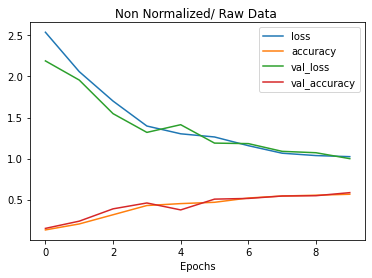

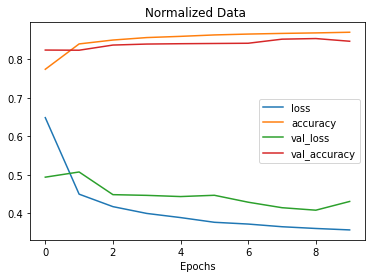

In [128]:
pd.DataFrame(history_raw.history).plot()
plt.xlabel("Epochs")
plt.title("Non Normalized/ Raw Data ")

pd.DataFrame(history_norm.history).plot()
plt.xlabel("Epochs")
plt.title("Normalized Data ")

Model: "test_model_01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_flatten_layer (Flatte  (None, 784)              0         
 n)                                                              
                                                                 
 hidden_layer_1 (Dense)      (None, 10)                7850      
                                                                 
 hidden_layer_2 (Dense)      (None, 20)                220       
                                                                 
 output_layer (Dense)        (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


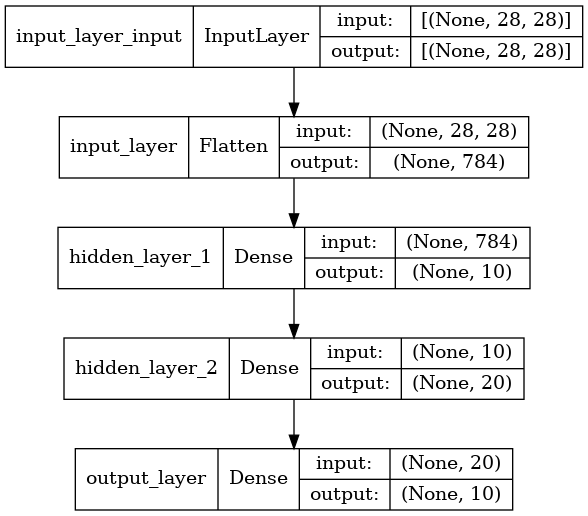

In [131]:
tf.random.set_seed(42)
fashion_model_1 = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28,28), name="input_flatten_layer"),
    tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=20, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(units=10, activation="softmax", name="output_layer"),
], name="test_model_01")
fashion_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])
fashion_model_1.summary()
tf.keras.utils.plot_model(model=fashion_model, show_shapes=True)

In [132]:
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [133]:
history_1 = fashion_model_1.fit(train_data_norm, 
                    train_labels_encoded,
                    epochs=40,
                    callbacks=[learning_rate_scheduler],
                    validation_data=(train_data_norm, train_labels_encoded))

Epoch 1/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6488 - accuracy: 0.7744 - val_loss: 0.4609 - val_accuracy: 0.8384 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4512 - accuracy: 0.8390 - val_loss: 0.4702 - val_accuracy: 0.8371 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4203 - accuracy: 0.8483 - val_loss: 0.4054 - val_accuracy: 0.8538 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4045 - accuracy: 0.8561 - val_loss: 0.3949 - val_accuracy: 0.8586 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3947 - accuracy: 0.8578 - val_loss: 0.3791 - val_accuracy: 0.8606 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3863 - accuracy: 0.8604 - val_loss: 0.4144 - val_accuracy: 0.8510 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

Text(0.5, 0, 'Epochs')

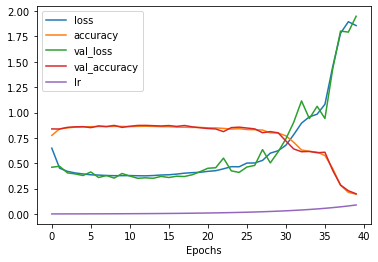

In [135]:
pd.DataFrame(history_1.history).plot()
plt.xlabel("Epochs")

Text(0, 0.5, 'loss')

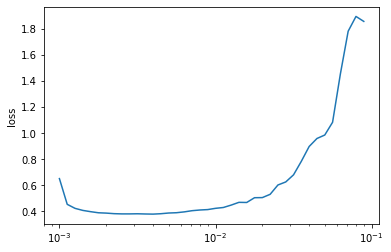

In [137]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_1.history["loss"])
plt.ylabel("loss")
# Notice that the 10^-3 - 0.001 is best suited for this (which is the default)

In [144]:
y_probs = fashion_model_norm.predict(test_data_norm)
y_probs
# As this is the prediction probability of the class

array([[8.3938821e-06, 5.5041070e-08, 6.6442465e-07, ..., 7.7015363e-02,
        1.6357329e-04, 6.5107179e-01],
       [6.4110216e-05, 7.1623957e-10, 9.6007639e-01, ..., 3.3142600e-20,
        2.1387311e-07, 3.2404556e-17],
       [3.0006440e-06, 9.9999022e-01, 1.8842928e-07, ..., 3.5224671e-21,
        3.3096033e-08, 1.9633087e-22],
       ...,
       [2.0804690e-02, 8.7332131e-07, 3.4720209e-04, ..., 1.3979933e-06,
        8.9576679e-01, 9.1298935e-10],
       [1.9406196e-05, 9.9947959e-01, 1.1092953e-05, ..., 1.1198025e-10,
        2.3220846e-06, 7.2111690e-09],
       [7.3138958e-06, 1.4391486e-09, 5.7348493e-06, ..., 7.9007857e-03,
        2.0937224e-04, 3.5831842e-04]], dtype=float32)

In [145]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [146]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

[print_confusion_matrix] The confusion matrix, shape : 
[[845   2  22  85   5   1  28   0  12   0]
 [  2 956   3  32   5   0   0   0   2   0]
 [ 18   2 731  21 198   0  27   0   3   0]
 [ 19  13   9 916  30   0  12   0   1   0]
 [  0   1  65  42 868   0  20   0   4   0]
 [  0   1   0   1   0 945   0  36   3  14]
 [187   1 147  85 195   0 368   0  17   0]
 [  0   0   0   0   0  25   0 954   0  21]
 [  5   0   8  15   6   5   2   6 953   0]
 [  0   0   0   0   0  18   1  45   0 936]], (10, 10)
[print_confusion_matrix] The matrix normalized is ::
 [[0.845 0.002 0.022 0.085 0.005 0.001 0.028 0.    0.012 0.   ]
 [0.002 0.956 0.003 0.032 0.005 0.    0.    0.    0.002 0.   ]
 [0.018 0.002 0.731 0.021 0.198 0.    0.027 0.    0.003 0.   ]
 [0.019 0.013 0.009 0.916 0.03  0.    0.012 0.    0.001 0.   ]
 [0.    0.001 0.065 0.042 0.868 0.    0.02  0.    0.004 0.   ]
 [0.    0.001 0.    0.001 0.    0.945 0.    0.036 0.003 0.014]
 [0.187 0.001 0.147 0.085 0.195 0.    0.368 0.    0.017 0.   ]
 [0.    

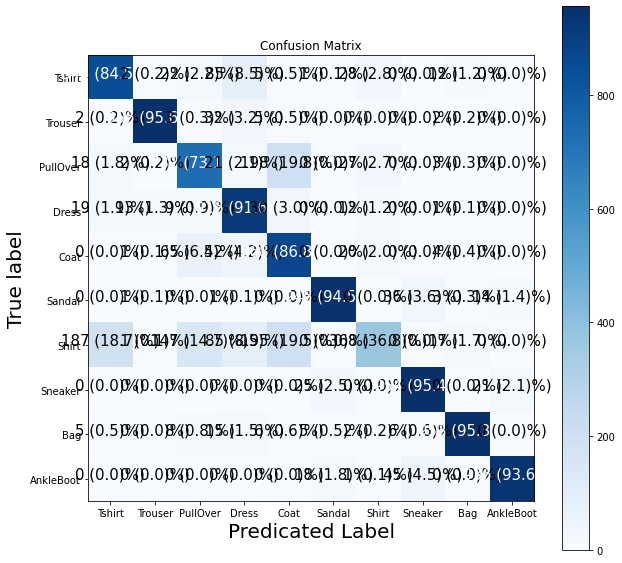

In [148]:
plot_confusion_matrix(test_labels, y_preds, class_names)

Finding what the layers learnt

In [150]:
fashion_model_norm.layers

In [155]:
weights, biases = fashion_model_norm.layers[1].get_weights()
weights.shape

(784, 10)

In [157]:
biases, biases.shape

(array([-0.03606989,  0.22919257, -0.14734831,  0.02514105,  0.46805575,
        -0.06433521,  0.12597562,  1.2023729 ,  0.60025334, -0.39194095],
       dtype=float32),
 (10,))

# End of Notes